***MAP_REDUCE JOB***

In [1]:
import csv
from functools import reduce

# Step 1: Read the dataset (Amazon Sale Report.csv)
def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data

# Step 2: Map function - Extract category and sales amount
def map_function(record):
    # Assuming 'Category' is in the 'Category' column and 'Amount' in the 'Amount' column
    category = record['Category']
    amount = float(record['Amount']) if record['Amount'] else 0
    return (category, amount)

# Step 3: Reduce function - Aggregate sales by category
def reduce_function(accumulated, current):
    category, amount = current
    if category in accumulated:
        accumulated[category] += amount
    else:
        accumulated[category] = amount
    return accumulated

# Step 4: Apply MapReduce
def map_reduce(data):
    # Map phase
    mapped_data = map(map_function, data)

    # Reduce phase
    result = reduce(reduce_function, mapped_data, {})

    return result

# Step 5: Process and clean data
def process_data(file_path):
    data = read_data(file_path)
    result = map_reduce(data)

    # Output the results: total sales per category
    for category, total_sales in result.items():
        print(f"Category: {category}, Total Sales: {total_sales}")

# Running the MapReduce job
file_path = 'Amazon Sale Report.csv'  # Update this path if needed
process_data(file_path)

Category: Set, Total Sales: 34421367.24999988
Category: kurta, Total Sales: 18253507.770000014
Category: Western Dress, Total Sales: 9370095.100000026
Category: Top, Total Sales: 4643547.019999998
Category: Ethnic Dress, Total Sales: 670117.0300000001
Category: Bottom, Total Sales: 142132.97999999998
Category: Saree, Total Sales: 108235.75999999998
Category: Blouse, Total Sales: 414735.93999999994
Category: Dupatta, Total Sales: 915.0


***APACHE SPARKS JOB***

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, count, desc

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Amazon Sales Report Analysis") \
    .getOrCreate()

# Load the CSV data into a Spark DataFrame
file_path = 'Amazon Sale Report.csv'  # Update the path accordingly
df = spark.read.csv(file_path, header=True, inferSchema=True)
# Show the first few rows of the data to inspect it
df.show(5)

+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel |ship-service-level|  Style|            SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city| ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|    0|405-8078784-5731545|04-30-22|           Cancelled|  Merchant|     Amazon.in|          Standard| SET

In [5]:
# Step 1: Data Aggregation - Calculate total sales by category
agg_sales = df.groupBy("Category").agg(
    sum("Amount").alias("Total_Sales"),
    count("Order ID").alias("Order_Count")
)

# Show the aggregated sales data
agg_sales.show()

+-------------+--------------------+-----------+
|     Category|         Total_Sales|Order_Count|
+-------------+--------------------+-----------+
| Ethnic Dress|   791217.6599999999|       1159|
|          Top|           5347792.3|      10622|
|          Set| 3.920412402999991E7|      50284|
|        Saree|           123933.76|        164|
|       Bottom|  150667.97999999998|        440|
|Western Dress| 1.121607269000002E7|      15500|
|       Blouse|           458408.18|        926|
|        kurta|2.1299546699999988E7|      49877|
|      Dupatta|               915.0|          3|
+-------------+--------------------+-----------+



In [6]:
# Step 2: Data Filtering - Filter for categories with sales > 1000
filtered_data = agg_sales.filter(col("Total_Sales") > 1000)

# Show the filtered data
filtered_data.show()

+-------------+--------------------+-----------+
|     Category|         Total_Sales|Order_Count|
+-------------+--------------------+-----------+
| Ethnic Dress|   791217.6599999999|       1159|
|          Top|           5347792.3|      10622|
|          Set| 3.920412402999991E7|      50284|
|        Saree|           123933.76|        164|
|       Bottom|  150667.97999999998|        440|
|Western Dress| 1.121607269000002E7|      15500|
|       Blouse|           458408.18|        926|
|        kurta|2.1299546699999988E7|      49877|
+-------------+--------------------+-----------+



In [7]:
# Step 3: Exploratory Data Analysis (EDA)

# Calculate the average sales per order
avg_sales = df.agg(avg("Amount").alias("Avg_Sales"))
avg_sales.show()

# Find the top 5 categories by total sales
top_categories = agg_sales.orderBy(desc("Total_Sales")).limit(5)
top_categories.show()

# Calculate the total sales across all categories
total_sales = agg_sales.agg(sum("Total_Sales").alias("Overall_Sales"))
total_sales.show()

+-----------------+
|        Avg_Sales|
+-----------------+
|648.5614647631621|
+-----------------+

+-------------+--------------------+-----------+
|     Category|         Total_Sales|Order_Count|
+-------------+--------------------+-----------+
|          Set| 3.920412402999991E7|      50284|
|        kurta|2.1299546699999988E7|      49877|
|Western Dress| 1.121607269000002E7|      15500|
|          Top|           5347792.3|      10622|
| Ethnic Dress|   791217.6599999999|       1159|
+-------------+--------------------+-----------+

+-------------------+
|      Overall_Sales|
+-------------------+
|7.859267829999992E7|
+-------------------+



In [13]:
# Stop the Spark session after the analysis is complete
spark.stop()

***Advanced Analytics and Machine Learning***

In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SalesPrediction').getOrCreate()

In [15]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv('Amazon Sale Report.csv', header=True, inferSchema=True)

# Handle missing values: Drop rows with null values
df = df.dropna()

In [16]:
# Remove any extra spaces in the column names
df = df.toDF(*[col.strip() for col in df.columns])

# Check the column names after stripping spaces
print(df.columns)


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [17]:
from pyspark.ml.feature import StringIndexer

# Apply StringIndexer to the 'Category' column
indexer = StringIndexer(inputCol="Category", outputCol="CategoryIndex")
df = indexer.fit(df).transform(df)

# Apply StringIndexer to the 'Sales Channel' column (after removing space)
indexer2 = StringIndexer(inputCol="Sales Channel", outputCol="SalesChannelIndex")
df = indexer2.fit(df).transform(df)

# Show the resulting DataFrame with indexed columns
df.show(5)


+-----+-------------------+--------+--------------------+----------+-------------+------------------+-------+--------------+-------------+----+----------+--------------+---+--------+------+----------------+---------------+----------------+------------+--------------------+-----+------------+-----------+-------------+-----------------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel|ship-service-level|  Style|           SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|       ship-city|     ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|CategoryIndex|SalesChannelIndex|
+-----+-------------------+--------+--------------------+----------+-------------+------------------+-------+--------------+-------------+----+----------+--------------+---+--------+------+----------------+---------------+----------------+------------+--------------------+-----+------------+-----------+-------------+--------

In [18]:
# Select features and label for the regression model
df = df.select("Amount", "CategoryIndex", "SalesChannelIndex", "Qty")

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

In [19]:
from pyspark.ml.feature import VectorAssembler

# Combine features into a single vector column
assembler = VectorAssembler(inputCols=["CategoryIndex", "SalesChannelIndex", "Qty"], outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

In [20]:
from pyspark.ml.regression import LinearRegression

# Train a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Amount")
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("Amount", "prediction").show(5)

+------+-----------------+
|Amount|       prediction|
+------+-----------------+
|   0.0|747.2303988863031|
|   0.0|747.2303988863031|
|   0.0|747.2303988863031|
|   0.0|747.2303988863031|
|   0.0|747.2303988863031|
+------+-----------------+
only showing top 5 rows



In [21]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Evaluate R2 (coefficient of determination)
evaluator_r2 = RegressionEvaluator(labelCol="Amount", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R2 on test data: {r2}")

Root Mean Squared Error (RMSE) on test data: 273.7028781532372
R2 on test data: 0.08765224285724638


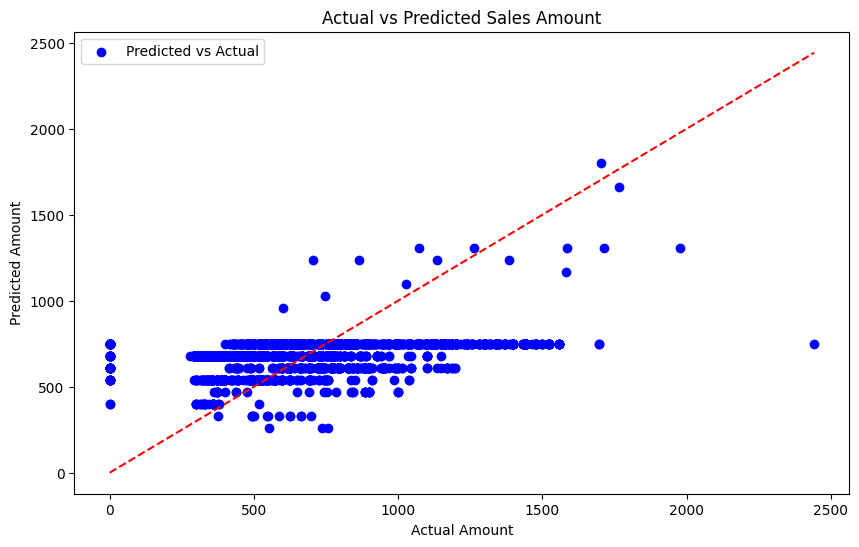

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas for visualization
predictions_pd = predictions.select("Amount", "prediction").toPandas()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['Amount'], predictions_pd['prediction'], color='blue', label='Predicted vs Actual')
plt.plot([0, max(predictions_pd['Amount'])], [0, max(predictions_pd['Amount'])], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales Amount')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.legend()
plt.show()

# Stop the Spark session after the analysis is complete
spark.stop()
